# using Decision Tree 

In [28]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
import seaborn as sns

In [43]:
def print_model_performance(model, y, prediction, id):
    labels = ['','Decision Tree-One Leaf', 'Optimized Decision Tree', 'Random Forest Regression', 'Linear Model']
    # print ('coeffecient:', model.coef_)
    # print ('intercept: ', model.intercept_)
    print (f'Mean squared Error (MSE): {mean_squared_error(y, prediction):.2f}')
    print (f'Mean absolute Error (MAE): {mean_absolute_error(y, prediction):.2f}')
    print (f'Coeffecint of determination (R2): {r2_score(y, prediction):.2f}')
    # print (f'Accuracy: {accuracy_score(y_true=y, y_pred=prediction)}')
    # sns.scatterplot(x=y, y=prediction)
    # sns.set_title()
    sns.regplot(x=y, y=prediction).set_title(labels[id])


# Use Decision Tree Regression - One leaf

In [30]:
def reg_decision_tree_1(train_X, val_X, train_y, val_y):
    # Specify Model
    iowa_model = DecisionTreeRegressor(random_state=1)
    # Fit Model
    iowa_model.fit(train_X, train_y)

    # Make validation predictions and calculate mean absolute error
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    # print("Validation MAE: {:,.0f}".format(val_mae))
    print_model_performance(iowa_model, val_y, val_predictions,1)


# Use Decision Tree with optimizating max_leaf_nodes

In [31]:
# model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [32]:
def reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y):
    candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
    # Write loop to find the ideal tree size from candidate_max_leaf_nodes
    mae=[]
    for i, max_leaf in enumerate(candidate_max_leaf_nodes):
        #print (i, max_leaf)
        x = get_mae(max_leaf, train_X, val_X, train_y, val_y)
        mae.append(x)
        print(f"Max leaf nodes: {max_leaf}  \t\t Mean Absolute Error:  {x:.2f}")
        
    # Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
    m = mae.index(min(mae))
    best_tree_size = candidate_max_leaf_nodes[m]

    final_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)
    # fit the final model 
    final_model.fit(X, y)
    pred = final_model.predict(val_X)
    print_model_performance(final_model, val_y, pred, 2)

# Use Random Forest regression model

In [33]:

# from sklearn.metrics import mean_absolute_error
def use_forest_regression(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    melb_preds = forest_model.predict(val_X)
    print_model_performance(forest_model, val_y, melb_preds, 3)

# Use Linear model regression

In [34]:
def use_linear_model(train_X, eval_X, train_y, eval_y):
    model = linear_model.LinearRegression()
    model.fit(train_X, train_y)
    pred = model.predict(eval_X)
    print_model_performance(model, eval_y, pred, 4)

# Regression analysis using 4 methods

In [35]:
iowa_file_path = r"C:\Yahia\Python\ML\data\train.csv"
home_data = pd.read_csv(iowa_file_path)

y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2)

print ('************ Decision Tree one level ***************')
reg_decision_tree_1(train_X, val_X, train_y, val_y)

print ('\n************ Decision Tree multi level optimized ***************')
reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

print ('\n************ User Forest model regression ***************')
use_forest_regression(train_X, val_X, train_y, val_y)

print ('\n************ Linear Model ***************')
use_linear_model(train_X, val_X, train_y, val_y)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Yahia\\Python\\ML\\data\\train.csv'

# BostonHousing data

Mean squared Error (MSE): 24.74
Mean absolute Error (MAE): 2.83
Coeffecint of determination (R2): 0.67
Max leaf nodes: 5  		 Mean Absolute Error:  3.28
Max leaf nodes: 25  		 Mean Absolute Error:  2.78
Max leaf nodes: 50  		 Mean Absolute Error:  2.75
Max leaf nodes: 100  		 Mean Absolute Error:  2.68
Max leaf nodes: 250  		 Mean Absolute Error:  2.68
Max leaf nodes: 500  		 Mean Absolute Error:  2.68
Mean squared Error (MSE): 1.30
Mean absolute Error (MAE): 0.92
Coeffecint of determination (R2): 0.98
Mean squared Error (MSE): 8.84
Mean absolute Error (MAE): 2.12
Coeffecint of determination (R2): 0.88

************ Linear Model ***************
Mean squared Error (MSE): 17.50
Mean absolute Error (MAE): 3.15
Coeffecint of determination (R2): 0.77


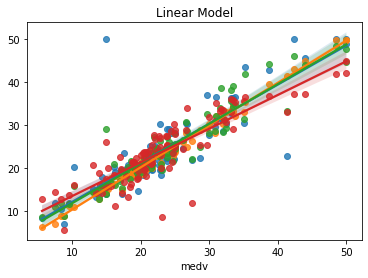

In [44]:
file_path = r".\\data\\BostonHousing.csv"
boston_data = pd.read_csv(file_path)

y= boston_data.medv
X = boston_data.drop('medv', axis='columns')

# # Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2)

# print ('************ Decision Tree one level ***************')
reg_decision_tree_1(train_X, val_X, train_y, val_y)

# print ('\n************ Decision Tree multi level optimized ***************')
reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

# print ('\n************ User Forest model regression ***************')
use_forest_regression(train_X, val_X, train_y, val_y)

print ('\n************ Linear Model ***************')
use_linear_model(train_X, val_X, train_y, val_y)
